# import libraries

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Load data

In [270]:
 data = pd.read_csv(r'c:\Users\sarah Alnuzha\Downloads\bank-additionalfull\bank-additional-full.csv', sep=';')

In [271]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA : Exploratory data analysis

In [272]:
data.shape

(41188, 21)

In [273]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There is no null values in dataframe

In [275]:
# Rename default and poutcome to has_credit_card and prev_outcome 
# (https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing)

data.rename(columns={'default': 'has_credit_card'}, inplace=True)
data.rename(columns={'poutcome': 'prev_outcome'}, inplace=True)

In [276]:
# List of categorical columns
categ_features = [col for col in dict(data.dtypes) 
                  if dict(data.dtypes)[col] in ['object']]

# Categorical features and their number of levels
print(data[categ_features].nunique())

job                12
marital             4
education           8
has_credit_card     3
housing             3
loan                3
contact             2
month              10
day_of_week         5
prev_outcome        3
y                   2
dtype: int64


In [277]:
# List of numerical columns
num_features = data.columns[data.dtypes != 'object']

# Numerical features and their number of levels
print(data[num_features].nunique())

age                 78
duration          1544
campaign            42
pdays               27
previous             8
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
dtype: int64


In [278]:
# Rename numerical columns
# (https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing)

data.rename(columns={'emp.var.rate': 'emp_var_rate'}, inplace=True)
data.rename(columns={'cons.conf.idx': 'confidence_index'}, inplace=True)
data.rename(columns={'cons.price.idx': 'price_index'}, inplace=True)
data.rename(columns={'euribor3m': 'eur_3month'}, inplace=True)
data.rename(columns={'nr.employed': 'no_of_employees'}, inplace=True)

In [279]:
data.head()

,age,job,marital,education,has_credit_card,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,prev_outcome,emp_var_rate,price_index,confidence_index,eur_3month,no_of_employees,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [280]:
# display all categorical values
for col in list(data.columns[data.dtypes == 'object']):
  print('\n',col+' :')
  print(data[col].unique())


 job :
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 marital :
['married' 'single' 'divorced' 'unknown']

 education :
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 has_credit_card :
['no' 'unknown' 'yes']

 housing :
['no' 'yes' 'unknown']

 loan :
['no' 'yes' 'unknown']

 contact :
['telephone' 'cellular']

 month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 day_of_week :
['mon' 'tue' 'wed' 'thu' 'fri']

 prev_outcome :
['nonexistent' 'failure' 'success']

 y :
['no' 'yes']


In [281]:
print("Before cleaning, there are " + str(data.shape[0]) + " rows and " + str(data.shape[1]) + " columns in this dataframe.")

Before cleaning, there are 41188 rows and 21 columns in this dataframe.


In [282]:
data.duplicated().sum()
print("There are " + str(data.duplicated().sum()) + " duplicated rows in the dataframe.")

There are 12 duplicated rows in the dataframe.


In [283]:
data = data.drop_duplicates()
print("After pre-cleaning, there are " + str(data.shape[0]) + " rows and " + str(data.shape[1]) + " columns in this dataframe.")

After pre-cleaning, there are 41176 rows and 21 columns in this dataframe.


## GENERAL DATAFRAME STATISTICS

In [284]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
price_index,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
confidence_index,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
eur_3month,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
no_of_employees,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


C:\Users\sarah Alnuzha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

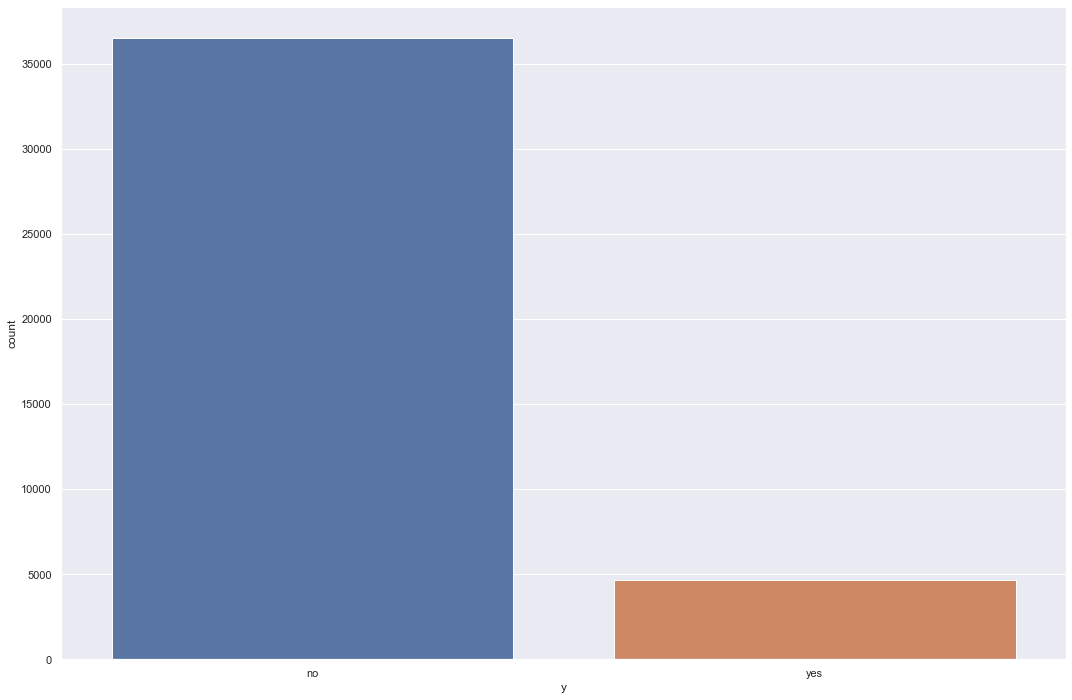

In [285]:
plt.figure(figsize=(18,12))
sns.countplot(data.y)

we found that we have inbalanced

Text(0.05, -0.05, '\nObservation:\n \nCampaign seem to be most successful among younger {< 20 years old} and older clients {>60 years old}\n')

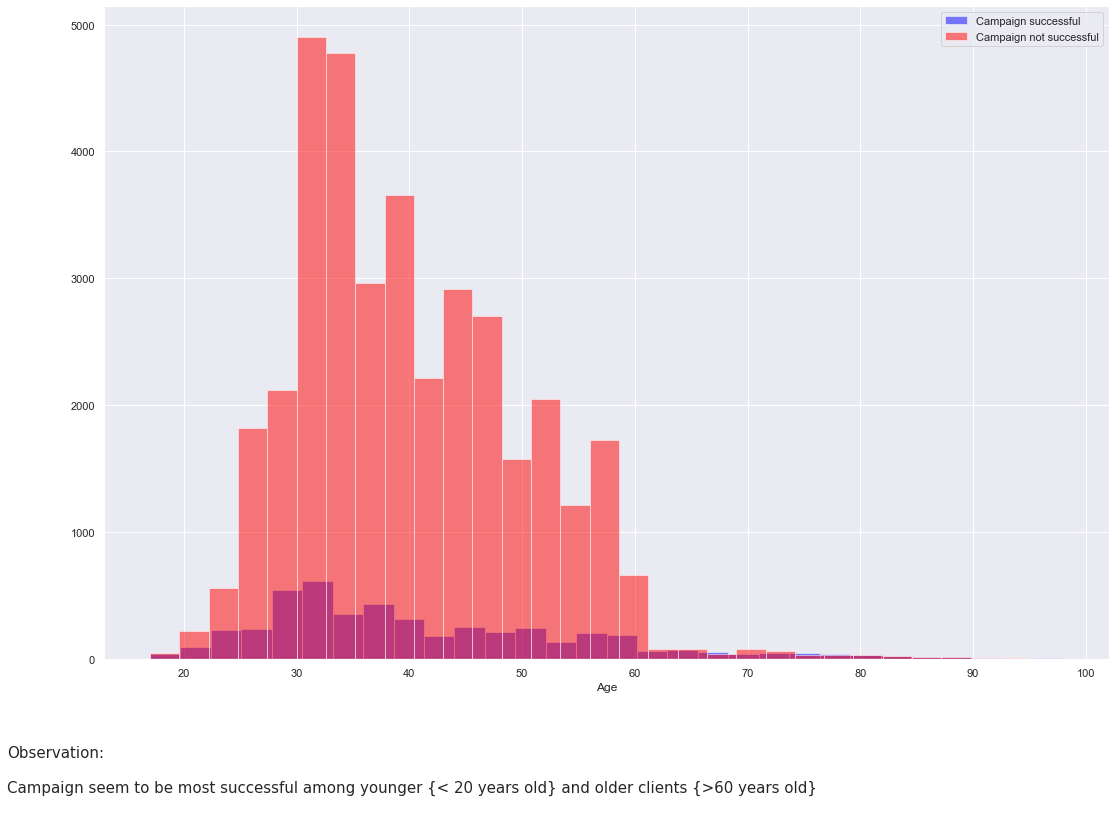

In [286]:
# Comparing age distribution between converted vs unconverted clients

plt.figure(figsize=(18,12))
data[data['y']=='yes']['age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Campaign successful')
data[data['y']=='no']['age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Campaign not successful')
plt.legend()
plt.xlabel('Age')

plt.figtext(0.05,-0.05,'''
Observation:\n 
Campaign seem to be most successful among younger {< 20 years old} and older clients {>60 years old}
''', family='San', size=15, ha='left')

In [287]:
# Mean age by profession
data[['job', 'age']].groupby(by=['job'], axis=0).mean().sort_values(by='age', ascending=True)

,age
job,
student,25.894857
services,37.925637
admin.,38.186870
technician,38.508681
blue-collar,39.555820
unemployed,39.733728
self-employed,39.949331
entrepreneur,41.723214
management,42.362859


Text(0.05, -0.05, '\nObservation:\n \nStudents tend to be younger while retirees are the oldest on average. \n\nNote that there are apparent outliers among both professions (young retirees and older students).\n')

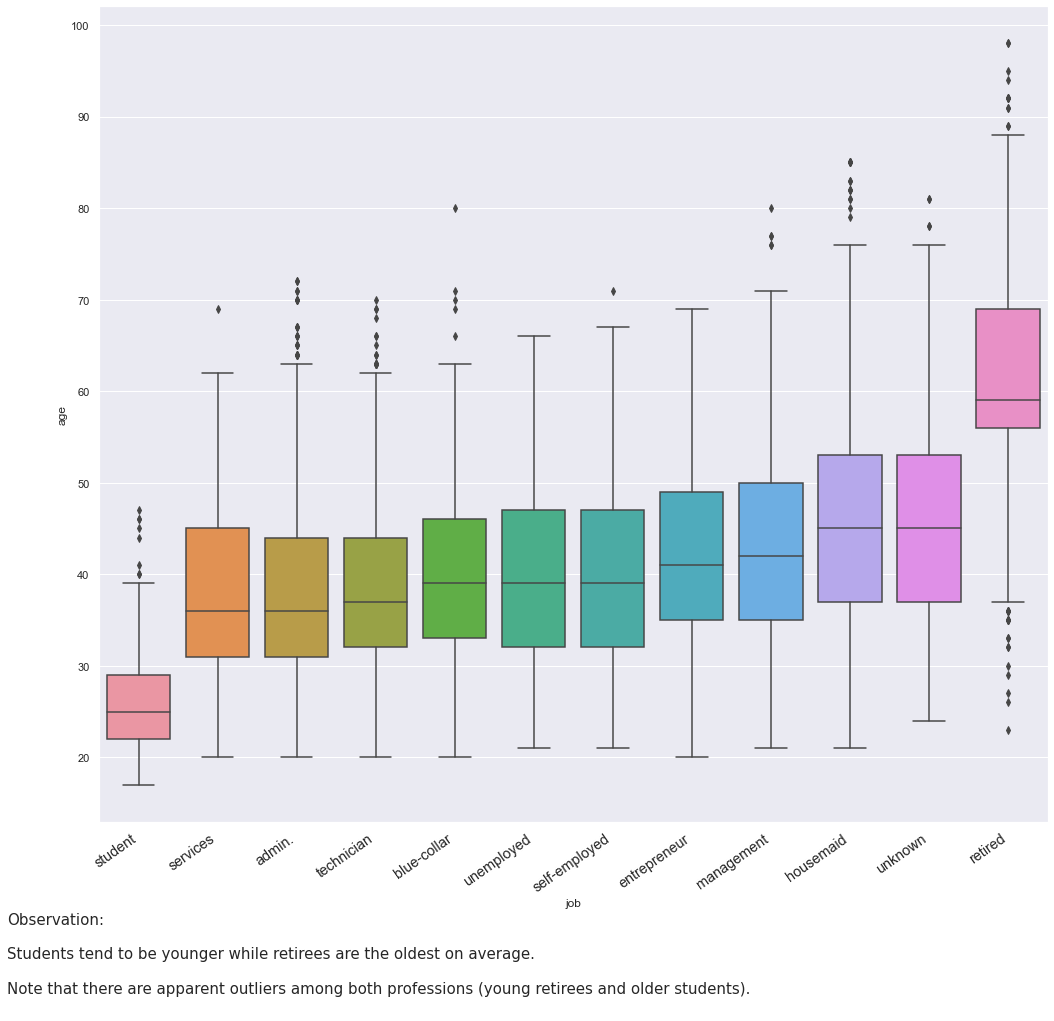

In [288]:
# Plot age distribution of clients by profession

job_order = data[['job', 'age']].groupby(by=['job'], axis=0).mean().sort_values(by='age', ascending=True).index

plt.figure(figsize=(17, 15))
sns.boxplot(x='job', y='age', data=data, order=job_order)
sns.set(font_scale=1)
plt.xticks(
    rotation=35, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

plt.figtext(0.05,-0.05,'''
Observation:\n 
Students tend to be younger while retirees are the oldest on average. \n
Note that there are apparent outliers among both professions (young retirees and older students).
''', family='San', size=15, ha='left')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'student'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'technician'),
  Text(4, 0, 'blue-collar'),
  Text(5, 0, 'unemployed'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'management'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'retired')])

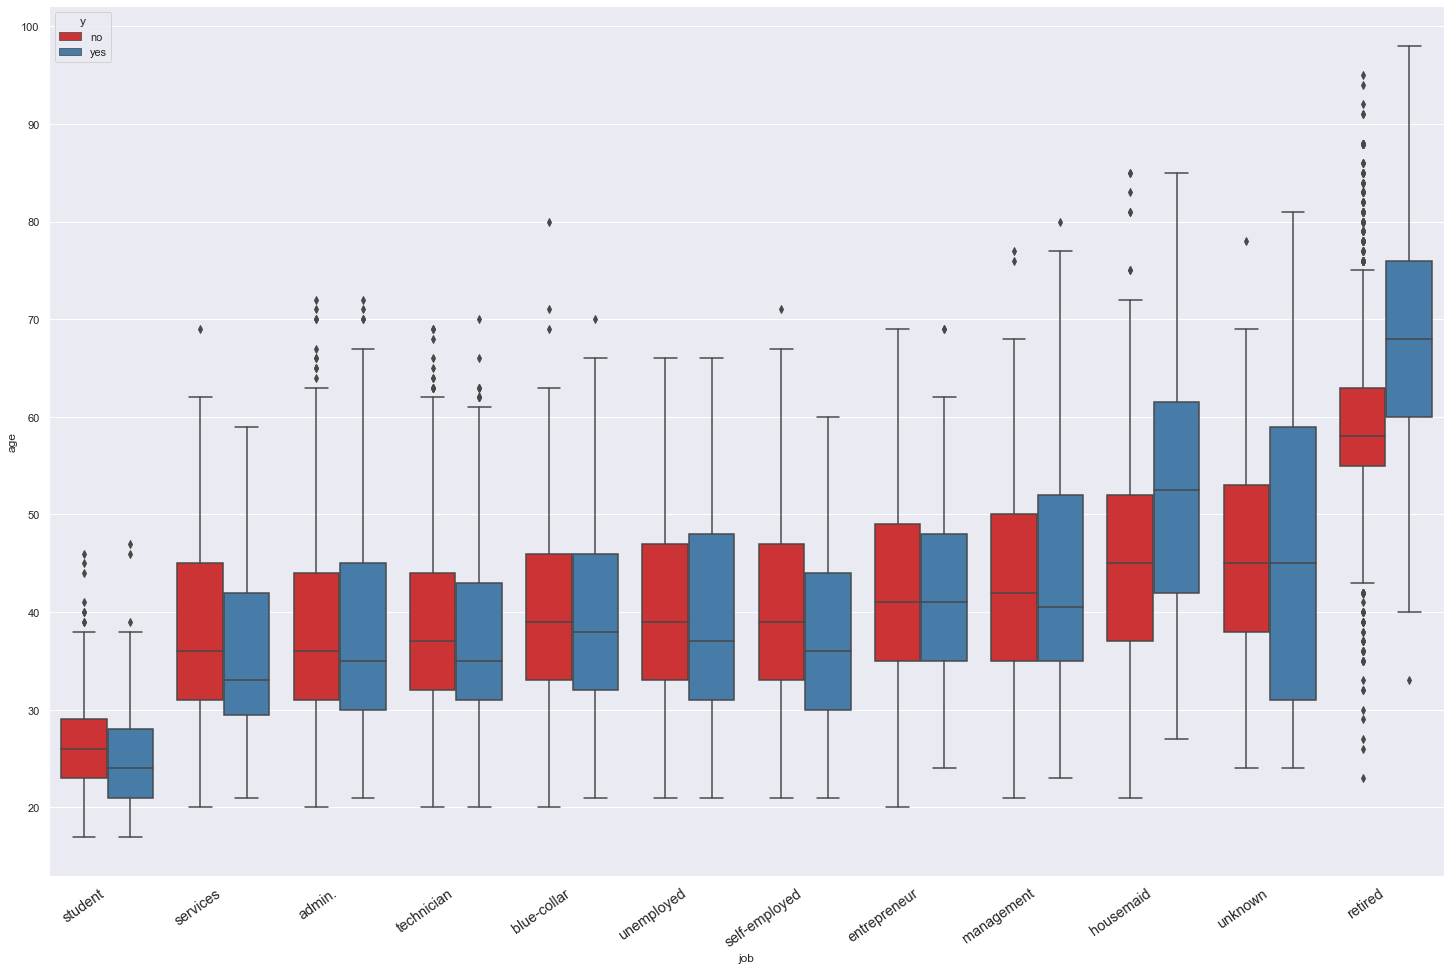

In [289]:
# Plot age distribution of clients by profession and campaign result

plt.figure(figsize=(25, 16))
sns.boxplot(x='job', y='age', hue='y', data=data, order=job_order, palette="Set1")
sns.set(font_scale=1)
plt.xticks(
    rotation=35, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)



Text(0.05, -0.05, '\nObservation:\n \nThe proportion of successful of marketing campaigns is higher among students and retirees compared to other professions.\n')

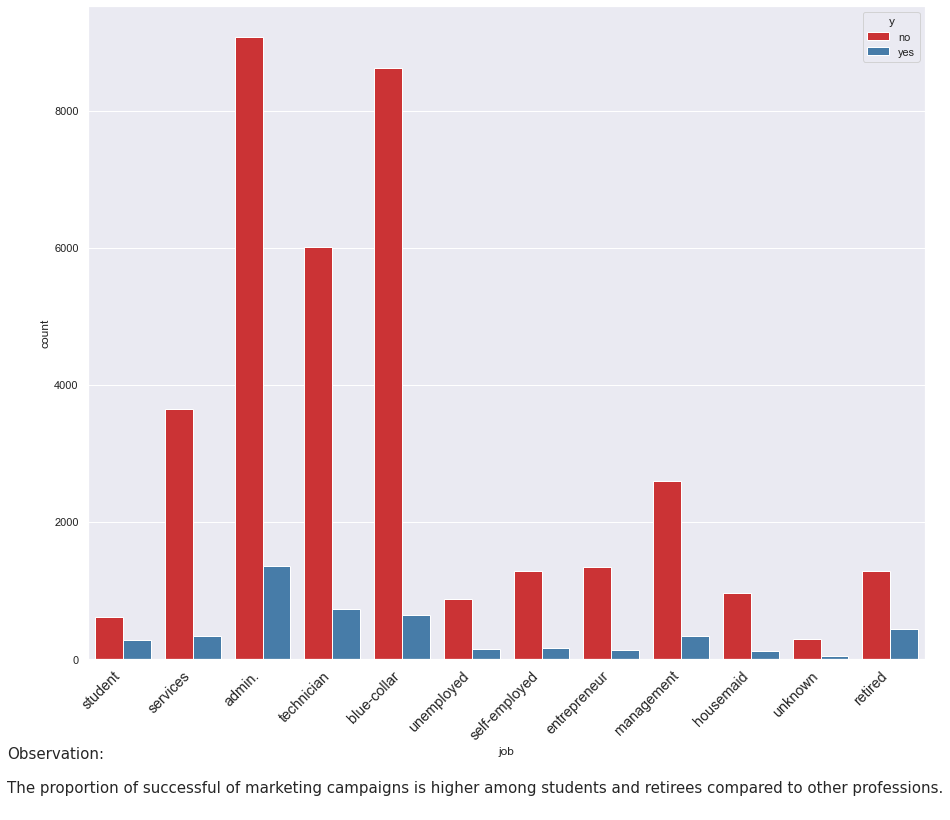

In [290]:
# Plot count of campaign success by client profession

plt.figure(figsize=(15,12))
sns.set(font_scale=1)
sns.countplot(x='job', hue='y', data=data, palette='Set1', order=job_order)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

plt.figtext(0.05,-0.05,'''
Observation:\n 
The proportion of successful of marketing campaigns is higher among students and retirees compared to other professions.
''', family='San', size=15, ha='left')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'single'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'married'),
  Text(3, 0, 'divorced')])

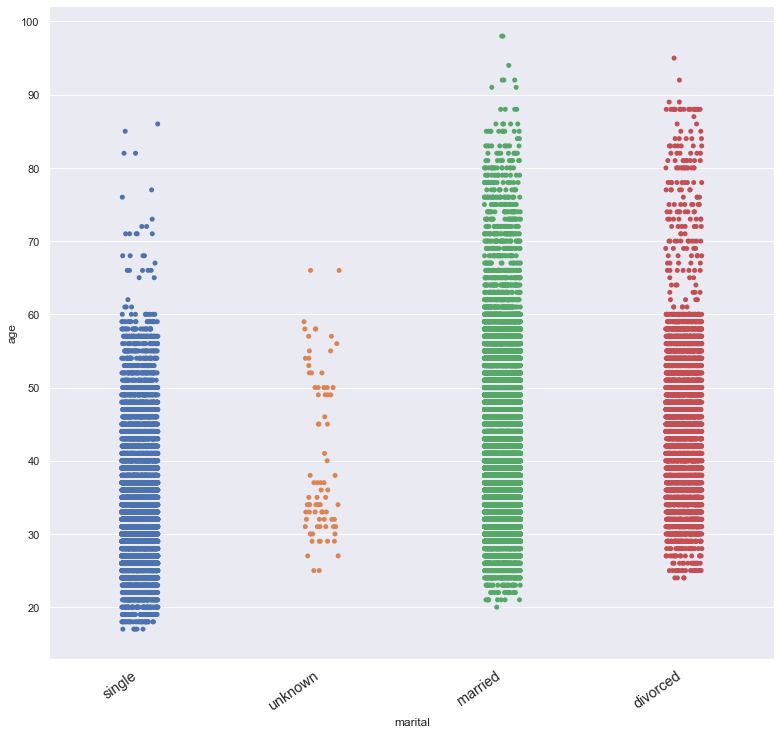

In [291]:
# Plot age distribution of clients by marital status

marital_order = data[['marital', 'age']].groupby(by=['marital'], axis=0).mean().sort_values(by='age', ascending=True).index

plt.figure(figsize=(13, 12))
sns.stripplot(x='marital', y='age', order=marital_order, data=data)
sns.set(font_scale=1)
plt.xticks(
    rotation=35, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'married'),
  Text(1, 0, 'single'),
  Text(2, 0, 'divorced'),
  Text(3, 0, 'unknown')])

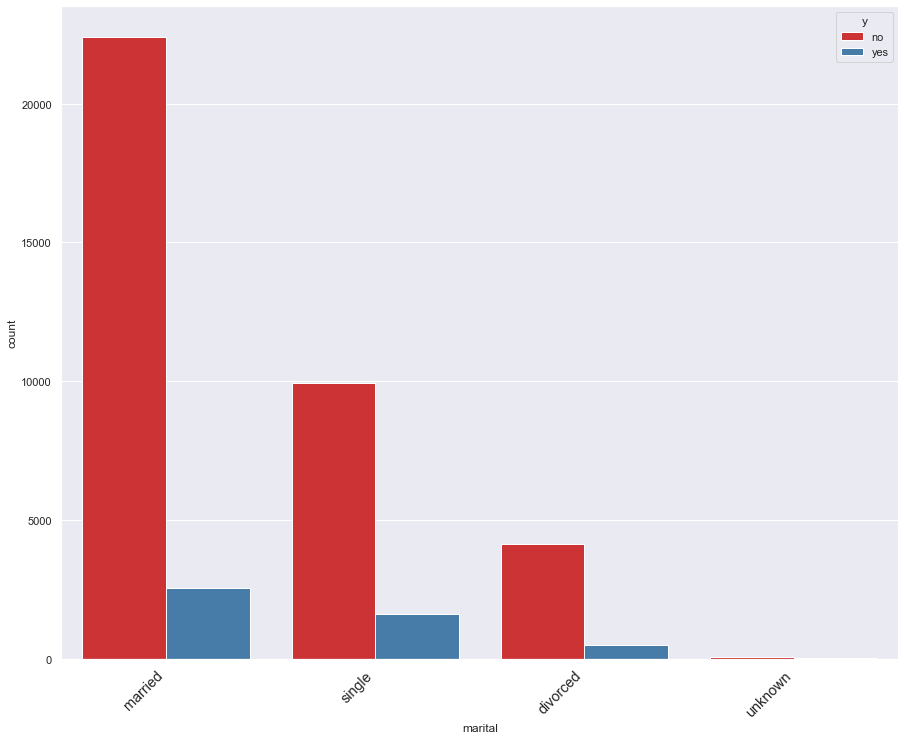

In [292]:
# Plot count of campaign success by client marital status

plt.figure(figsize=(15,12))
sns.set(font_scale=1)
sns.countplot(x='marital', hue='y', data=data, palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'illiterate'),
  Text(1, 0, 'basic.4y'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'high.school'),
  Text(5, 0, 'professional.course'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'unknown')])

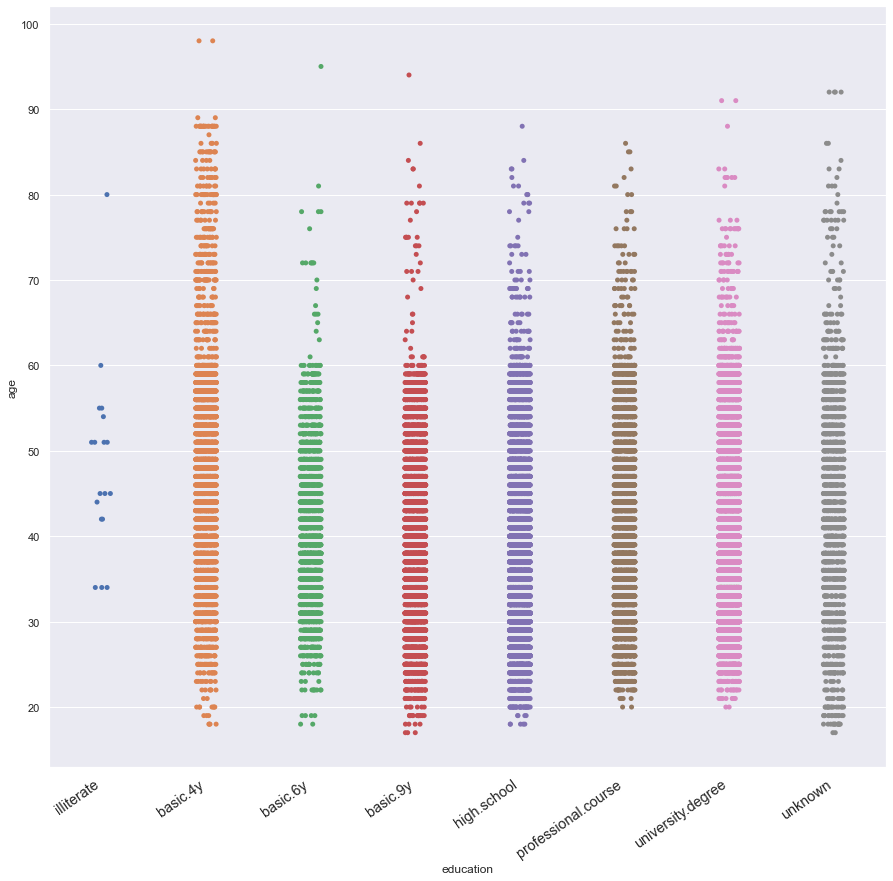

In [293]:
# Plot age distribution of clients by level of education

education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'unknown']

plt.figure(figsize=(15, 14))
sns.stripplot(x='education', y='age', data=data, order=education_order)
sns.set(font_scale=1)
plt.xticks(
    rotation=35, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)


<AxesSubplot:xlabel='education', ylabel='count'>

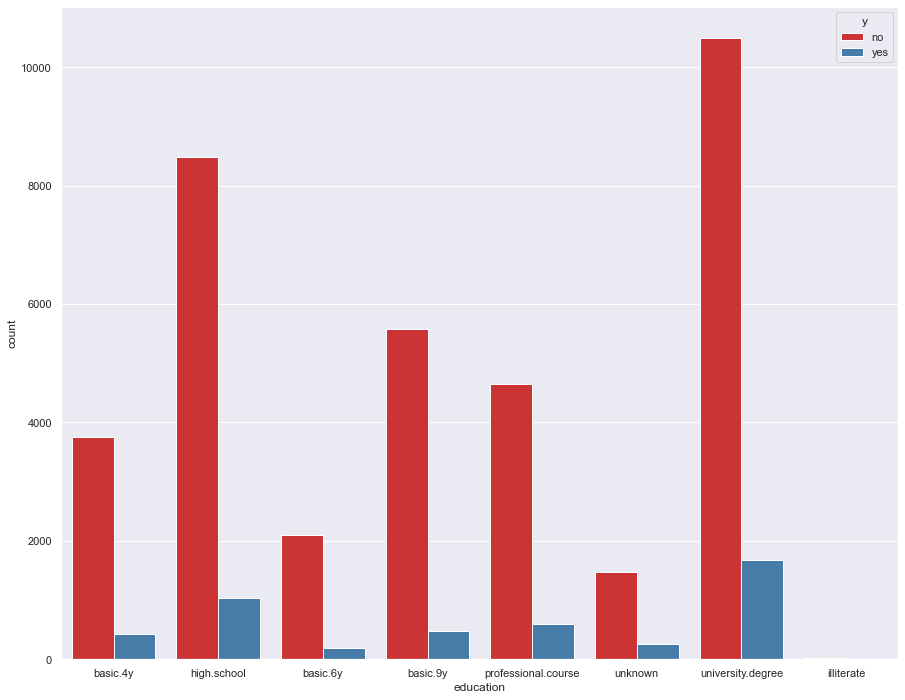

In [294]:
# Campaign success by client's level of education

plt.figure(figsize=(15,12))
sns.set(font_scale=1)
sns.countplot(x='education', hue='y', data=data, palette='Set1')

<AxesSubplot:xlabel='has_credit_card', ylabel='count'>

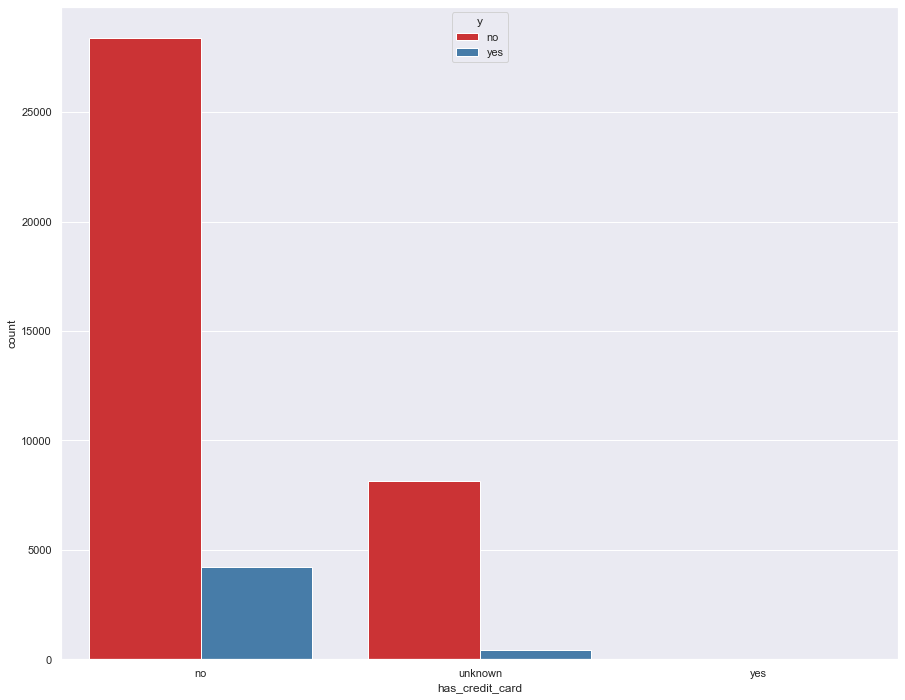

In [295]:
# Campaign success based on whether client has a credit in default

plt.figure(figsize=(15,12))
sns.set(font_scale=1)
sns.countplot(x='has_credit_card', hue='y', data=data, palette='Set1')

<AxesSubplot:xlabel='housing', ylabel='count'>

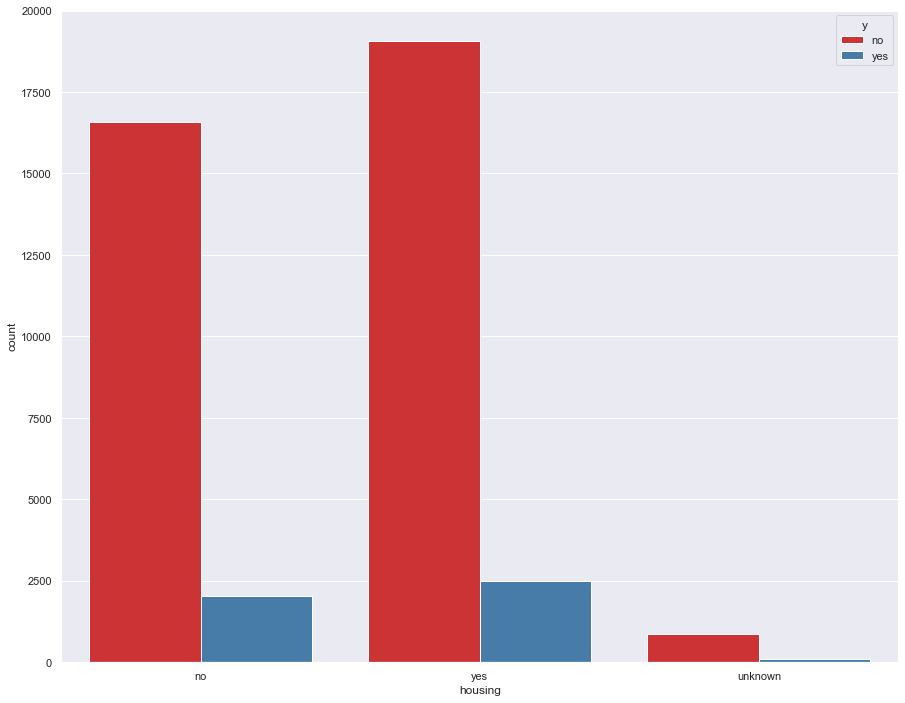

In [296]:
# Campaign success based on whether client has active housing loan

plt.figure(figsize=(15,12))
sns.set(font_scale=1)
sns.countplot(x='housing', hue='y', data=data, palette='Set1')


<AxesSubplot:xlabel='loan', ylabel='count'>

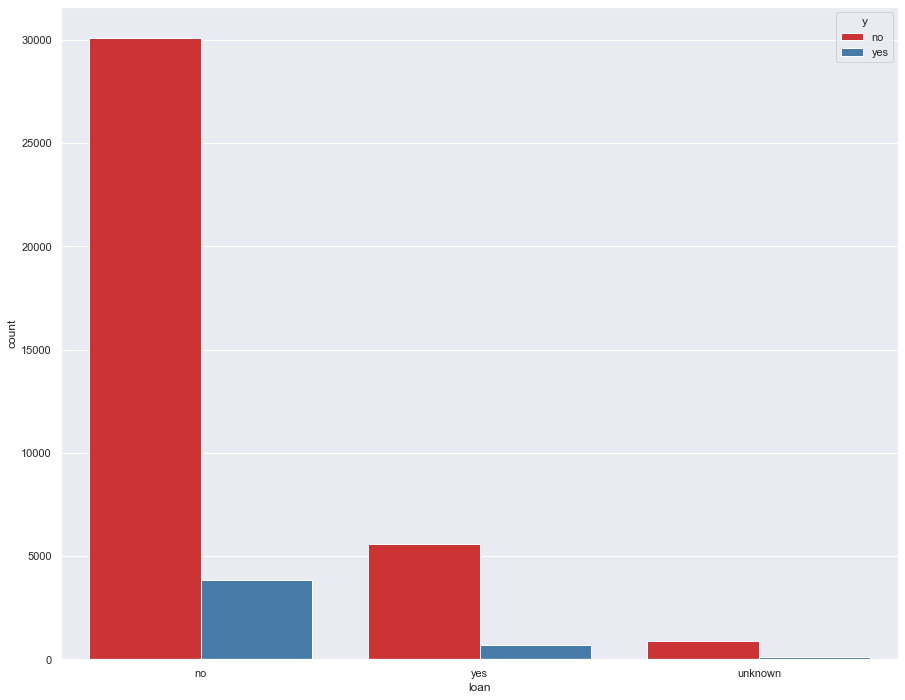

In [297]:
# Campaign success based on whether client has active personal loan

plt.figure(figsize=(15,12))
sns.set(font_scale=1)
sns.countplot(x='loan', hue='y', data=data, palette='Set1')

Text(0.05, -0.05, '\nObservation:\n \nClients contacted through their cellular phone (as opposed to home telephone) \nseem likelier to respond positively to the direct marketing campaign.\n')

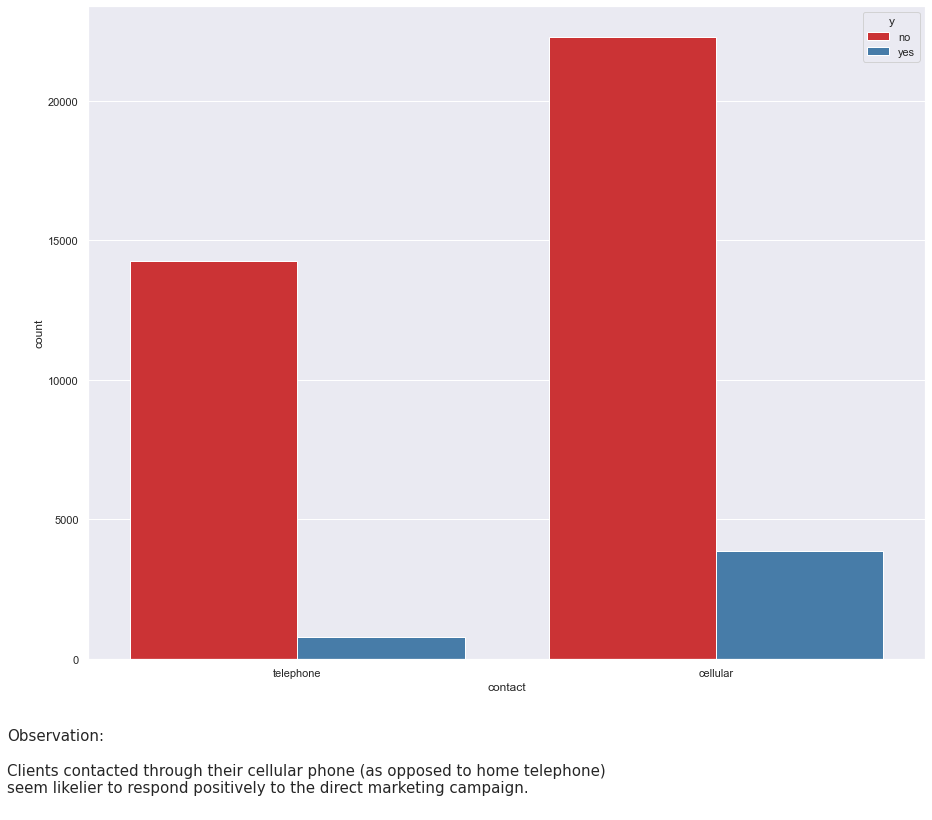

In [298]:
# Campaign success based on whether client's contact information availability (cellular vs. telephone)

plt.figure(figsize=(15,12))
sns.set(font_scale=1)
sns.countplot(x='contact', hue='y', data=data, palette='Set1')

plt.figtext(0.05,-0.05,'''
Observation:\n 
Clients contacted through their cellular phone (as opposed to home telephone) 
seem likelier to respond positively to the direct marketing campaign.
''', family='San', size=15, ha='left')

Text(0.05, -0.05, '\nObservation:\n \nThe majority of our clients are contacted through their home phones as opposed to their cellular telephone.\n')

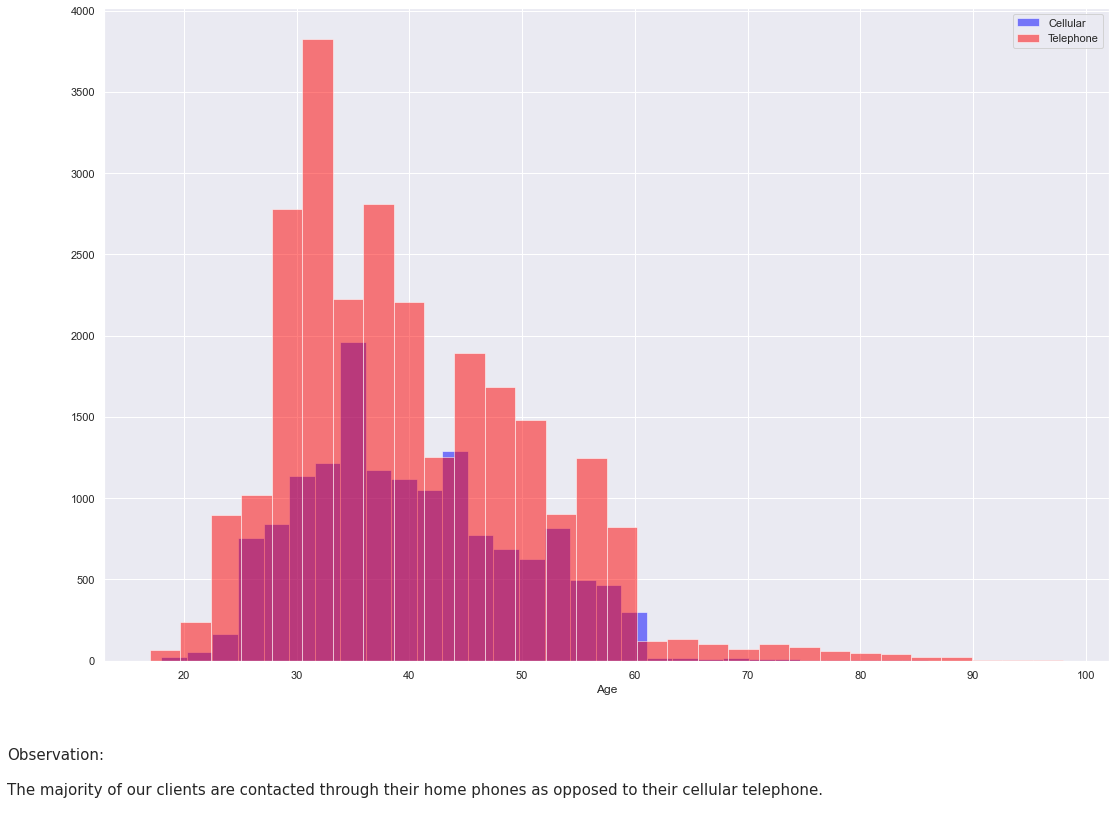

In [299]:
# Comparing age distribution between clients contacted on cellular vs telephone

plt.figure(figsize=(18,12))
data[data['contact']=='telephone']['age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Cellular')
data[data['contact']!='telephone']['age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Telephone')
plt.legend()
plt.xlabel('Age')

plt.figtext(0.05,-0.05,'''
Observation:\n 
The majority of our clients are contacted through their home phones as opposed to their cellular telephone.
''', family='San', size=15, ha='left')

Text(0.5, 0, 'consumer confidence index')

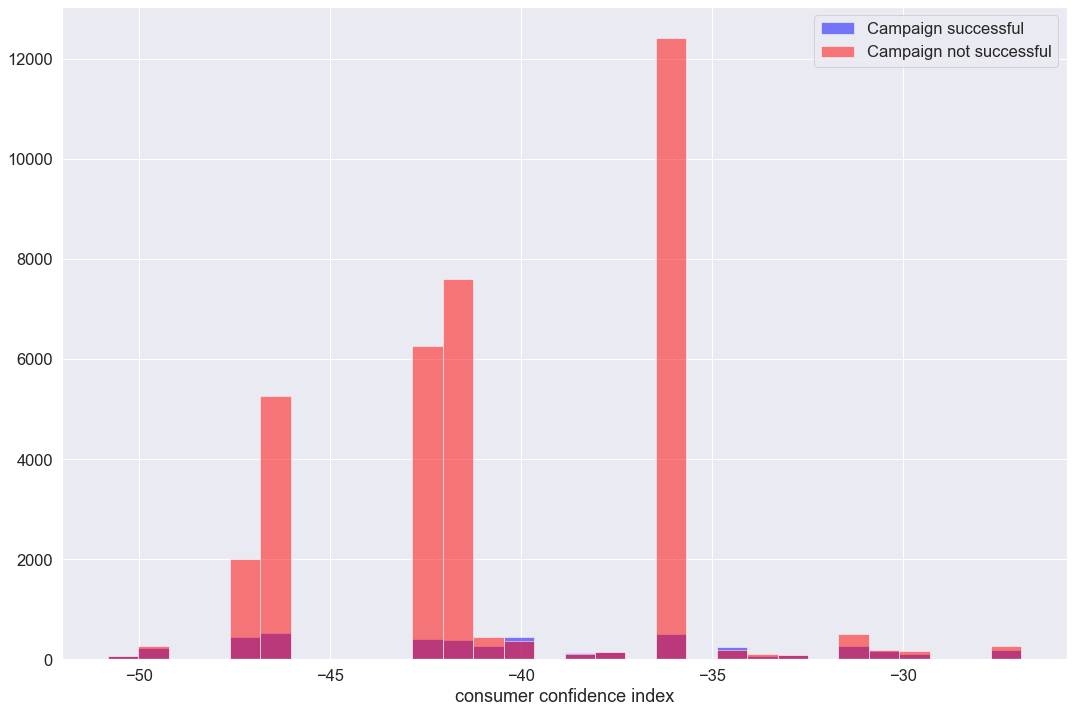

In [300]:
# Plot Consumer Confidence Index

plt.figure(figsize=(18,12))
sns.set(font_scale=1.5)
data[data['y']=='yes']['confidence_index'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Campaign successful')
data[data['y']=='no']['confidence_index'].hist(alpha=0.5,color='red',
                                              bins=30,label='Campaign not successful')
plt.legend()
plt.xlabel('consumer confidence index')


Text(0.5, 0, 'number of employees')

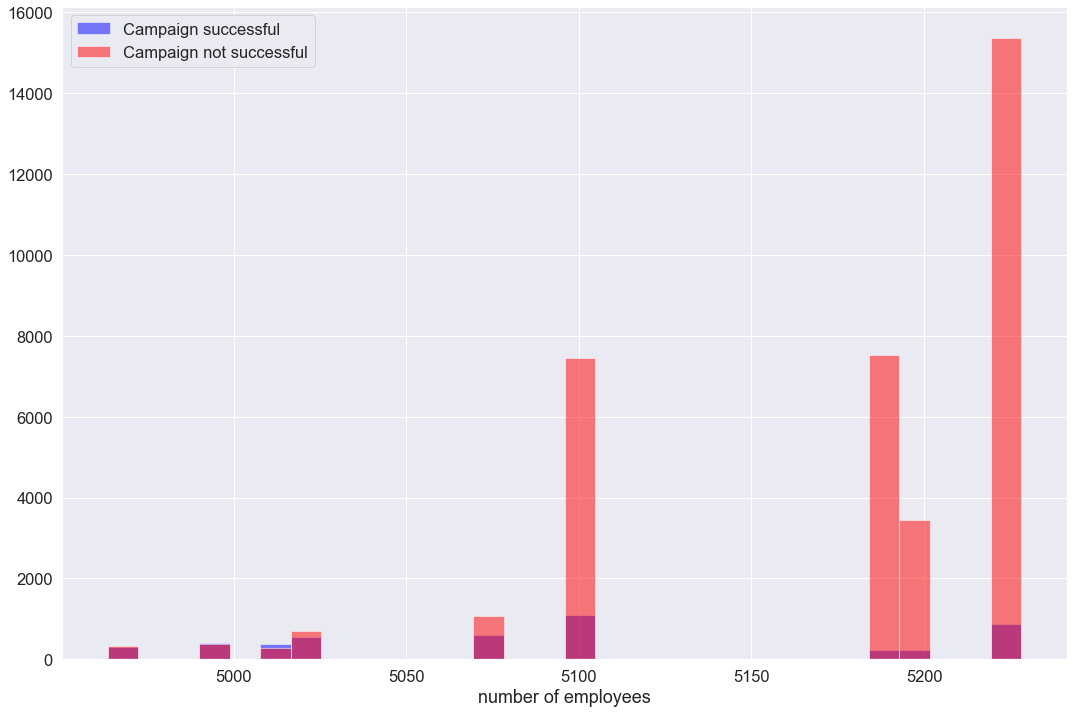

In [301]:
# Plot Number of Employed People (quarterly indicator)


plt.figure(figsize=(18,12))
sns.set(font_scale=1.5)
data[data['y']=='yes']['no_of_employees'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Campaign successful')
data[data['y']=='no']['no_of_employees'].hist(alpha=0.5,color='red',
                                              bins=30,label='Campaign not successful')
plt.legend()
plt.xlabel('number of employees')

(-1.75, 25.0)

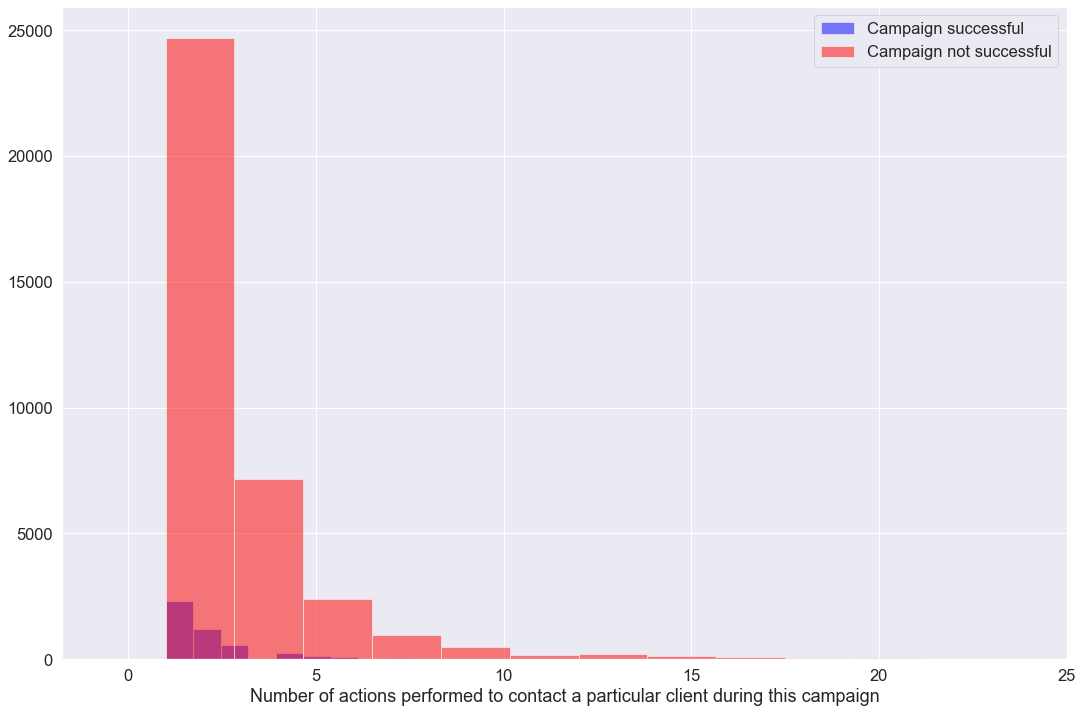

In [302]:
# Plot `campaign` or number of actions performed to contact a particular client during this campaign


plt.figure(figsize=(18,12))
sns.set(font_scale=1.5)
data[data['y']=='yes']['campaign'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Campaign successful')
data[data['y']=='no']['campaign'].hist(alpha=0.5,color='red',
                                              bins=30,label='Campaign not successful')
plt.legend()
plt.xlabel('Number of actions performed to contact a particular client during this campaign')
plt.xlim(right=25)

Text(0.05, -0.05, '\nObservation:\n \nClients who have responded positively to a past marketing campaign are much likelier to respond postively to current marketing campaign. \n\n')

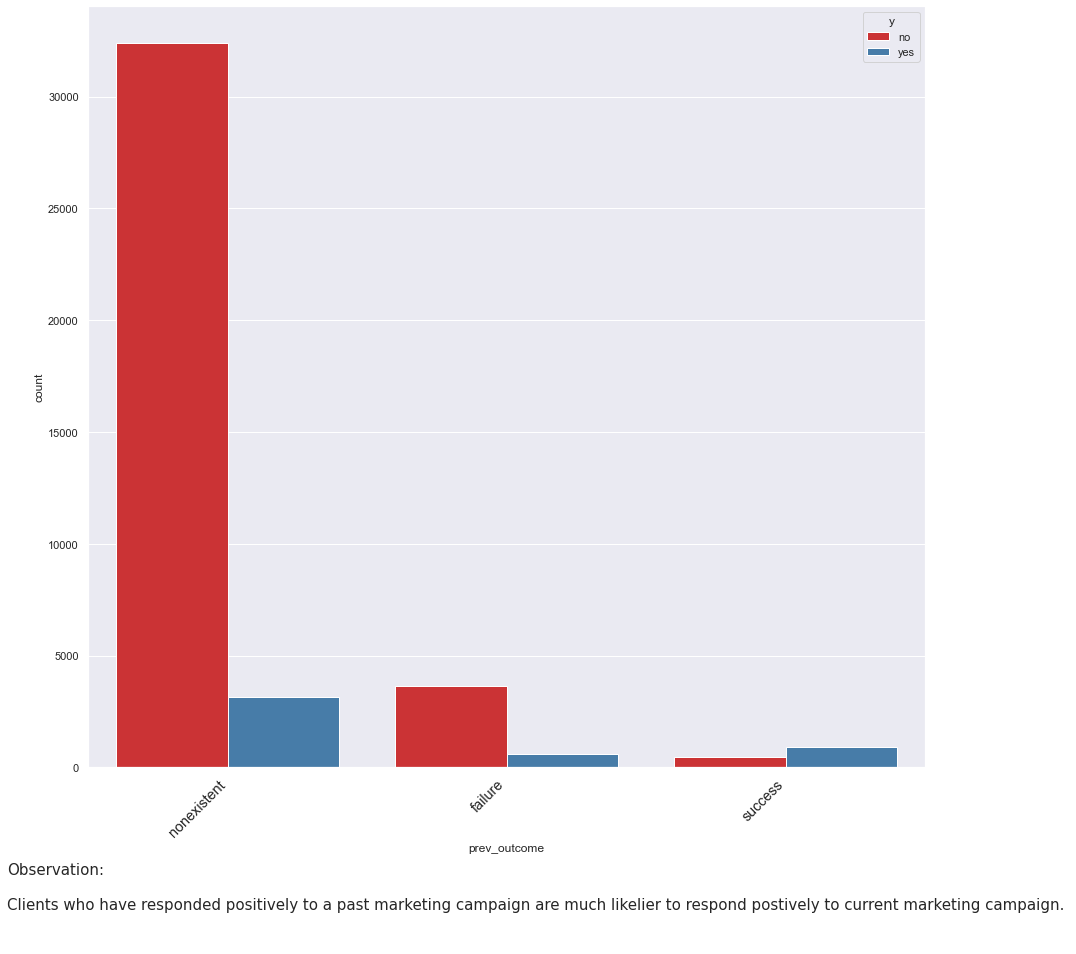

In [303]:
# Plot campaign success by outcome of previous campaign

plt.figure(figsize=(15,14))
sns.set(font_scale=1)
sns.countplot(x='prev_outcome', hue='y', data=data, palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

plt.figtext(0.05,-0.05,'''
Observation:\n 
Clients who have responded positively to a past marketing campaign are much likelier to respond postively to current marketing campaign. \n
''', family='San', size=15, ha='left')

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

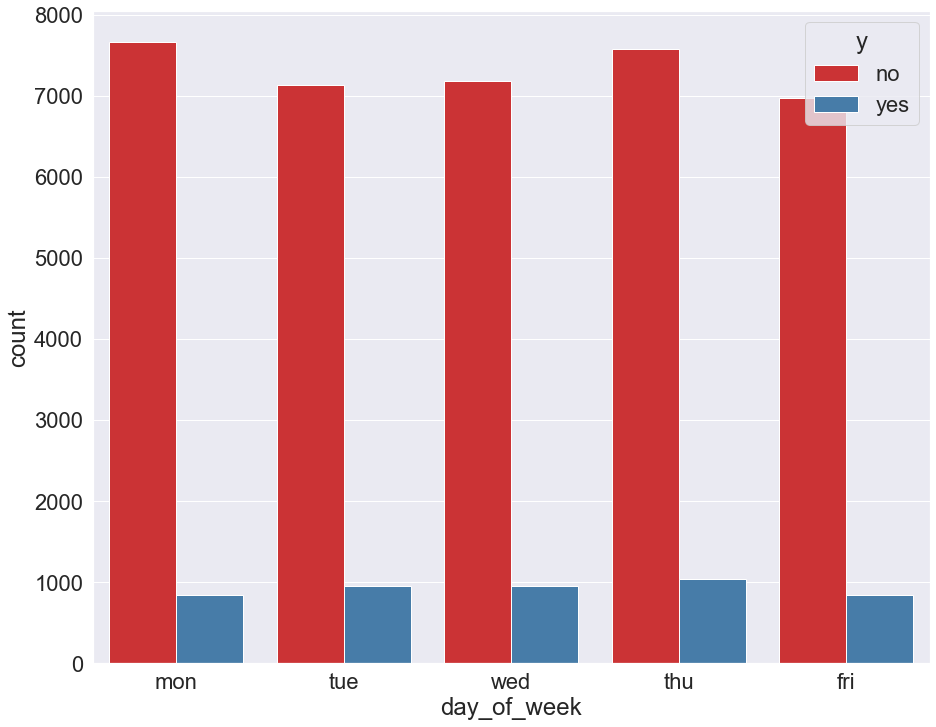

In [304]:
# Plot campaign success by day of week

plt.figure(figsize=(15,12))
sns.set(font_scale=2)
sns.countplot(x='day_of_week', hue='y', data=data, palette='Set1')

<AxesSubplot:xlabel='month', ylabel='count'>

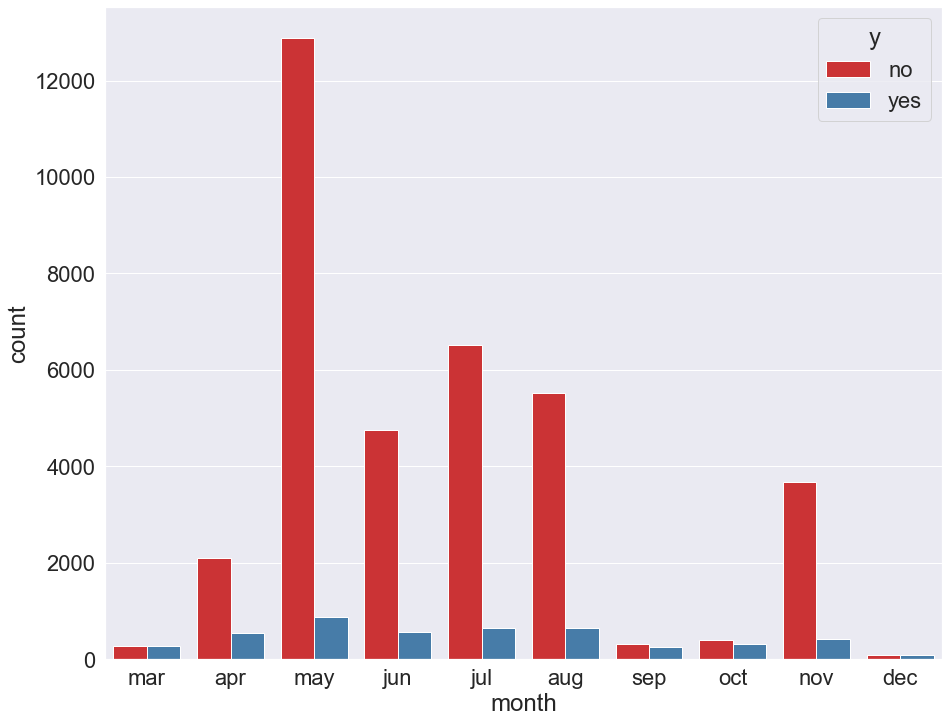

In [305]:
# Plot campaign success by month

month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plt.figure(figsize=(15,12))
sns.set(font_scale=2)
sns.countplot(x='month', hue='y', data=data, order = month_order, palette='Set1')


## CORRELATION MATRIX OF DATAFRAME

In [306]:
data.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,price_index,confidence_index,eur_3month,no_of_employees
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp_var_rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
price_index,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
confidence_index,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
eur_3month,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
no_of_employees,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


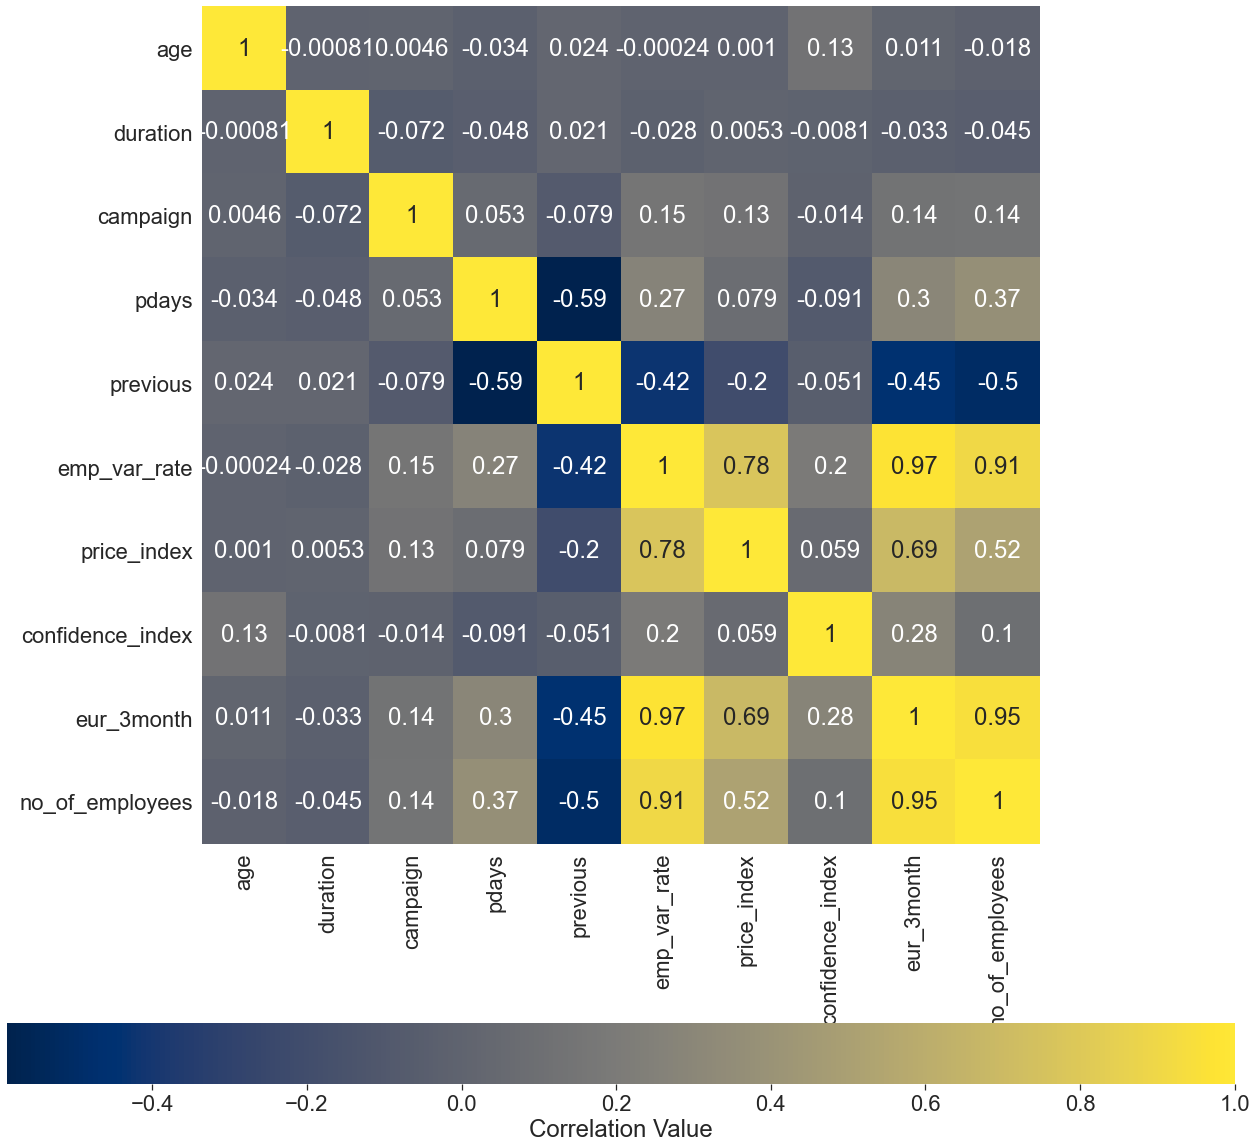

In [307]:
#cmap = sns.diverging_palette(100, 200, s = 40, l = 65, n = 9)
corrmat = data.corr()
plt.subplots(figsize = (22, 22))
sns.heatmap(corrmat,cmap = "cividis",annot = True, square = True, cbar_kws = {'label': 'Correlation Value', 'orientation': 'horizontal'});

## Outlier Handling

In [308]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [309]:
# Replace outlier values with median

for col in ['age', 'campaign', 'pdays', 'confidence_index']:
  sample_outliers = detect_outliers_iqr(data[col])
  median = np.median(data[col])
  for i in sample_outliers:
      data[col] = np.where(data[col]==i, median, data[col])

In [310]:
# List of categorical columns
[col for col in dict(data.dtypes) 
                  if dict(data.dtypes)[col] in ['object']]

['job',
 'marital',
 'education',
 'has_credit_card',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'prev_outcome',
 'y']

**One-Hot** encoding allows us to turn nominal categorical data into features with numerical values, white not mathematically imply any ordinal relationship between the classes



In [311]:
# Nominative (unordered) categorical features for one-hot encoding
features_nom = ['job',
   'marital',
   'education',
   'has_credit_card',
   'housing',
   'loan',
   'contact',
   'month',
   'day_of_week',
   'prev_outcome']


def encode(df):
    # Split data for one-hot-encoding
    X = data.drop('y', axis=1)
    y = data['y']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=1)

    # Apply one-hot encoder to each feature column with categorical data
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype=int)
    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[features_nom]))
    OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[features_nom]))

    # One-hot encoding removed index, let's put it back
    OH_cols_train.index = X_train.index
    OH_cols_valid.index = X_valid.index

    # Get appropriate column names for new one-hot encoding
    OH_cols_train.columns = OH_encoder.get_feature_names(features_nom)
    OH_cols_valid.columns = OH_encoder.get_feature_names(features_nom)

    # Remove old categorical columns (to replace with one-hot encoding)
    num_X_train = X_train.drop(features_nom, axis=1)
    num_X_valid = X_valid.drop(features_nom, axis=1)

    # Add one-hot encoded columns to numerical features
    OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
    OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

    # Merge the splits back
    X = pd.concat([OH_X_train, OH_X_valid])
    y = pd.concat([y_train, y_valid])

    # Convert `y` to boolean values
    y = y.map(dict(yes=1, no=0))
 
    # Join `X` and `y` back into one
    df = X.join(y)

    return df,X,y

In [312]:
#data = pd.read_csv('/content/bank-direct-marketing-campaigns.csv', sep=',')
df,X,y = encode(data)

In [313]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'price_index', 'confidence_index', 'eur_3month', 'no_of_employees',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'has_credit_card_no', 'has_credit_card_unknown',
       'has_credit_card_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month

In [314]:
# How much do the other columns correlate with the target column "y"?

y_corr = df.corr()["y"]
y_corr = pd.DataFrame(y_corr)
y_corr

,y
age,-0.020295
duration,0.405297
campaign,-0.047028
pdays,NaN
previous,0.230202
...,...
day_of_week_wed,0.006290
prev_outcome_failure,0.031794
prev_outcome_nonexistent,-0.193522
prev_outcome_success,0.316302


In [315]:
print("After encoding, there are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns in this dataframe.")

After encoding, there are 41176 rows and 64 columns in this dataframe.


<AxesSubplot:>

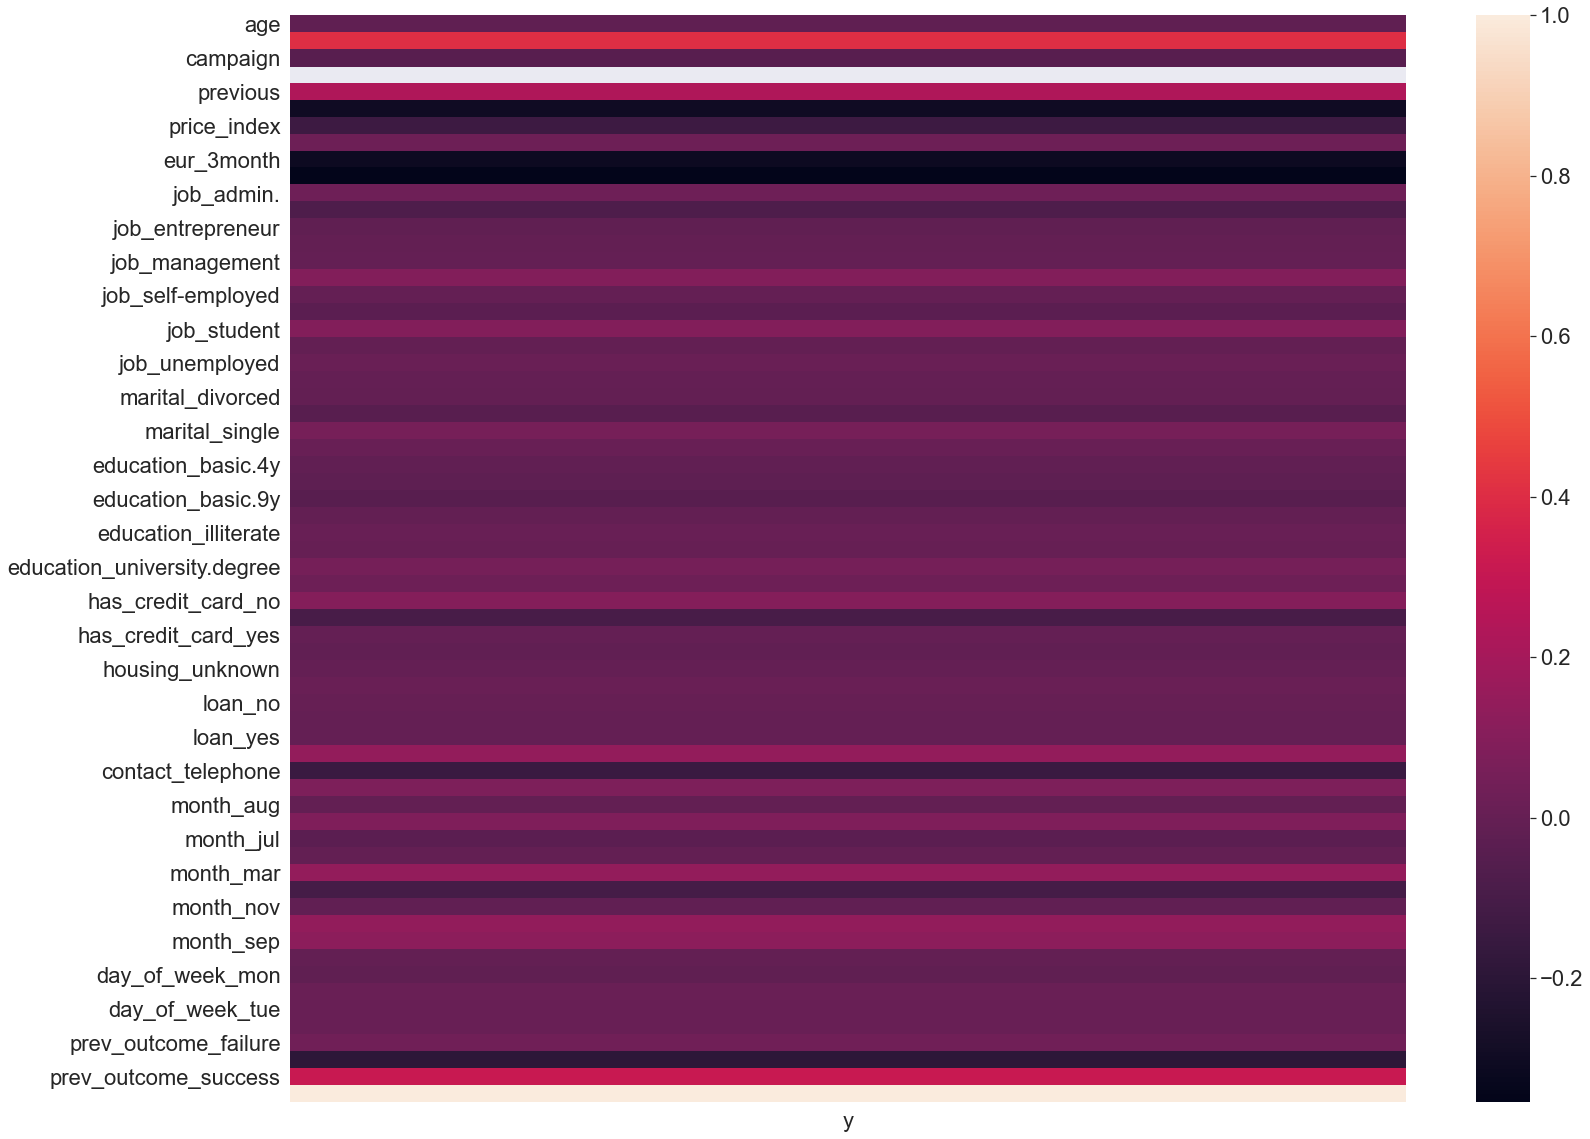

In [316]:
plt.figure(figsize = (25,20))
sns.heatmap(y_corr)

# Feature Engineering

In [317]:
def make_mi_scores(X, y):
    X = X.copy()
    # Exclude continous features
    X = X.select_dtypes(exclude=['float'])
    mi_scores = mutual_info_classif(X, y, random_state=1)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')

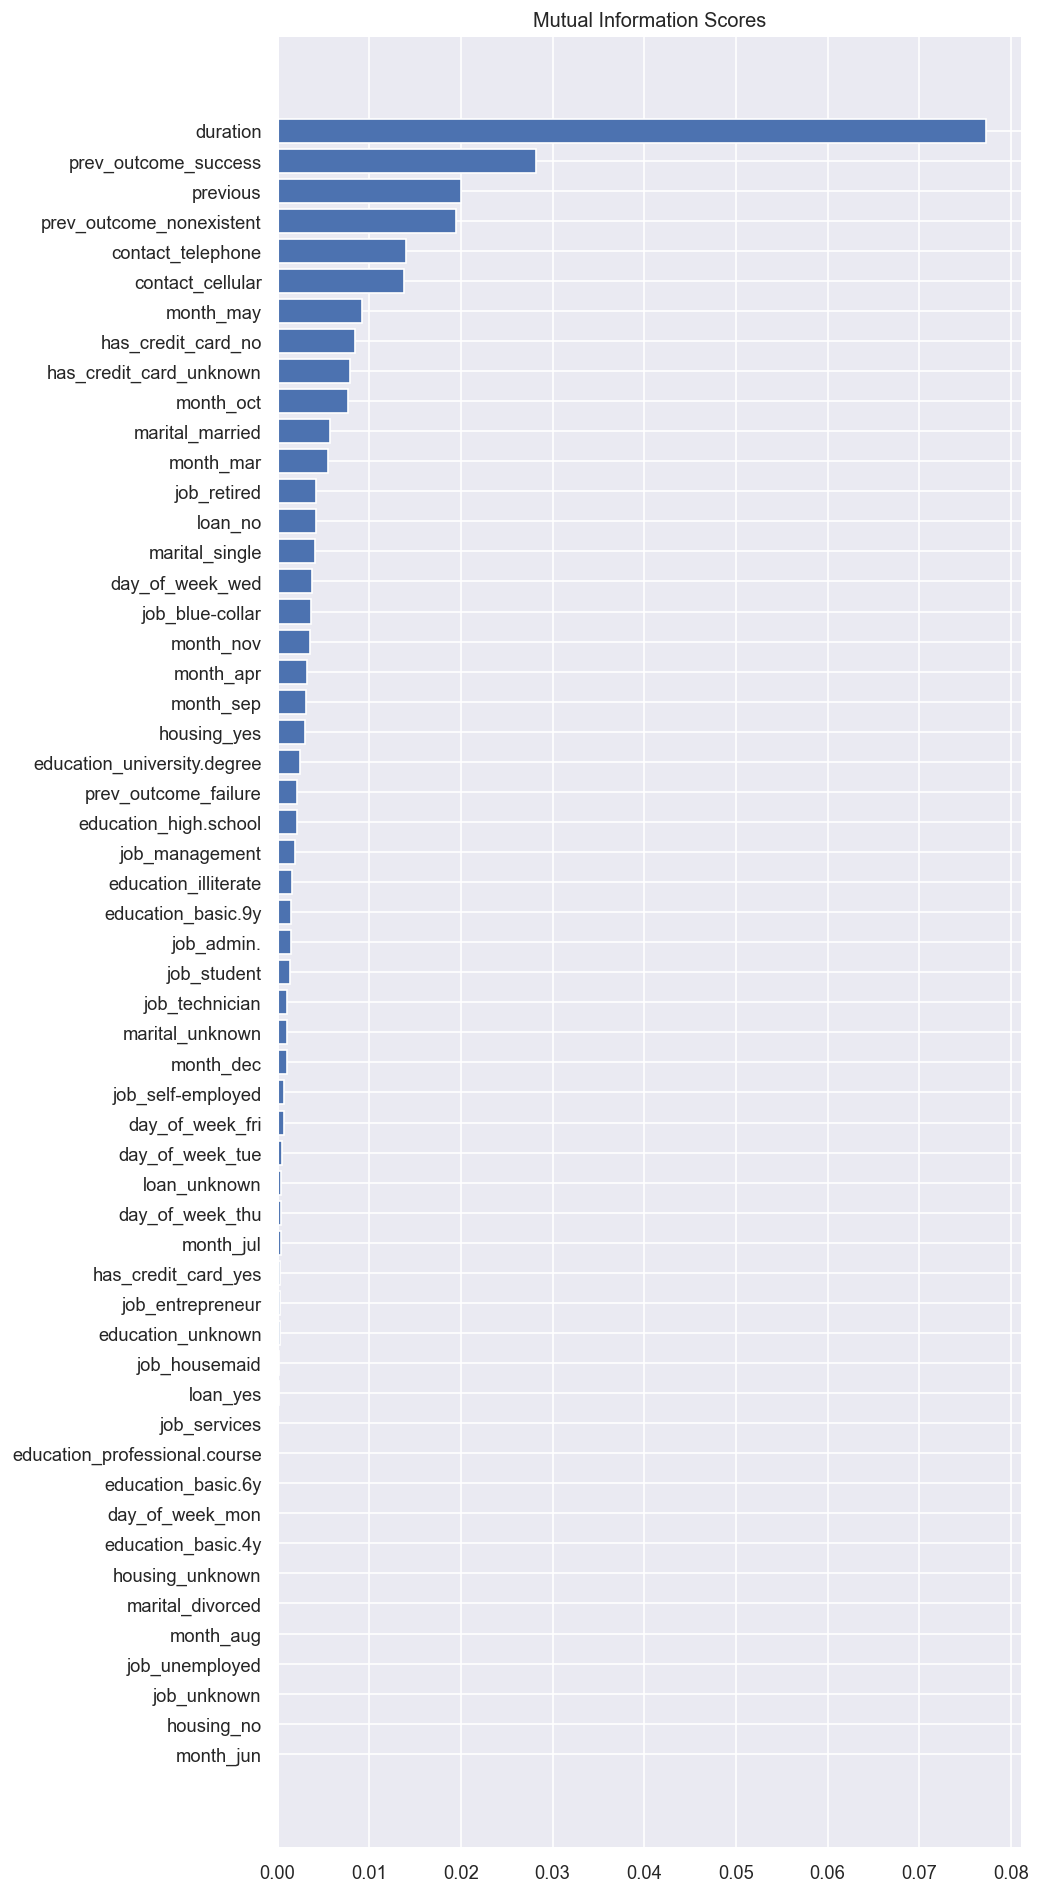

In [318]:
mi_scores = make_mi_scores(X, y)

# Show Mutual Information (MI) score plot
plt.figure(dpi=120, figsize=(8, 20))
sns.set(font_scale=1)
plot_mi_scores(mi_scores)


We have a number of features that are highly informative and several that don't seem to be informative at all (at least by themselves). We will try dropping features with 0.0 MI scores.

In [319]:
def drop_low_mi(df, mi_scores):
    low_mi_features = mi_scores[mi_scores==0.0].index
    df = df.drop(low_mi_features, axis=1)
    return df

In [320]:
df = drop_low_mi(df, mi_scores)
df.shape

(41176, 52)

In [321]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'price_index', 'confidence_index', 'eur_3month', 'no_of_employees',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'has_credit_card_no', 'has_credit_card_unknown',
       'has_credit_card_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month

In [322]:
X = df.drop('y', axis=1)
y = df['y']

In [323]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [324]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scal = scaler.fit_transform(X_res)

In [325]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scal, y_res, test_size=0.33, random_state=1)

In [326]:
print('X_train, X_test, y_train, y_test:\t',X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train, X_test, y_train, y_test:	 (48959, 51) (24115, 51) (48959,) (24115,)


#ANN

In [327]:
model = keras.Sequential(
    [
     keras.layers.Dense(360, activation='relu', input_shape=(df.shape[1] - 1,)),
     keras.layers.Dense(360, activation='relu'),
     keras.layers.BatchNormalization(axis=1),
     keras.layers.Dropout(0.2),
     keras.layers.Dense(180, activation='relu'),
     keras.layers.BatchNormalization(axis=1),
     keras.layers.Dropout(0.2),
     keras.layers.Dense(1, activation='sigmoid'),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 360)               18720     
_________________________________________________________________
dense_9 (Dense)              (None, 360)               129960    
_________________________________________________________________
batch_normalization_4 (Batch (None, 360)               1440      
_________________________________________________________________
dropout_4 (Dropout)          (None, 360)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 180)               64980     
_________________________________________________________________
batch_normalization_5 (Batch (None, 180)               720       
_________________________________________________________________
dropout_5 (Dropout)          (None, 180)              

In [328]:
metrics = [
          #  keras.metrics.Precision(),
          #  keras.metrics.Recall(),
           keras.metrics.Accuracy()
          ]
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'], loss=keras.losses.BinaryCrossentropy())


In [329]:
history = model.fit(X_train, y_train, batch_size=64, epochs=250, verbose=2, shuffle=True, validation_split=0.20, callbacks=[callback])

Epoch 1/250
612/612 - 3s - loss: 0.1769 - accuracy: 0.9270 - val_loss: 0.1297 - val_accuracy: 0.9434
Epoch 2/250
612/612 - 2s - loss: 0.1406 - accuracy: 0.9377 - val_loss: 0.1264 - val_accuracy: 0.9441
Epoch 3/250
612/612 - 2s - loss: 0.1338 - accuracy: 0.9398 - val_loss: 0.1268 - val_accuracy: 0.9409
Epoch 4/250
612/612 - 2s - loss: 0.1253 - accuracy: 0.9426 - val_loss: 0.1259 - val_accuracy: 0.9430
Epoch 5/250
612/612 - 2s - loss: 0.1230 - accuracy: 0.9444 - val_loss: 0.1265 - val_accuracy: 0.9432
Epoch 6/250
612/612 - 2s - loss: 0.1207 - accuracy: 0.9452 - val_loss: 0.1284 - val_accuracy: 0.9457
Epoch 7/250
612/612 - 2s - loss: 0.1157 - accuracy: 0.9470 - val_loss: 0.1230 - val_accuracy: 0.9444
Epoch 8/250
612/612 - 2s - loss: 0.1151 - accuracy: 0.9472 - val_loss: 0.1297 - val_accuracy: 0.9436
Epoch 9/250
612/612 - 2s - loss: 0.1104 - accuracy: 0.9494 - val_loss: 0.1320 - val_accuracy: 0.9437
Epoch 10/250
612/612 - 2s - loss: 0.1104 - accuracy: 0.9508 - val_loss: 0.1255 - val_accura

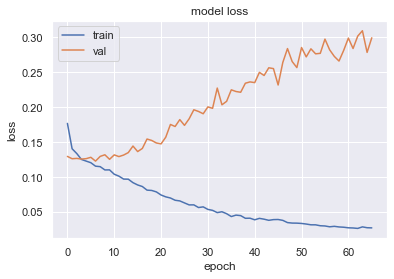

In [330]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

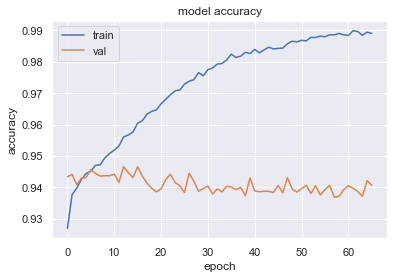

In [331]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [332]:
y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: 1 if x > 0.5 else 0, y_pred)))

0.9384615384615385

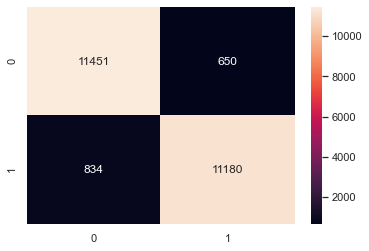

In [333]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True)
accuracy_score(y_test, y_pred)

# LogisticRegression

In [334]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

C:\Users\sarah Alnuzha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuraccy is:	 0.9375077752436243


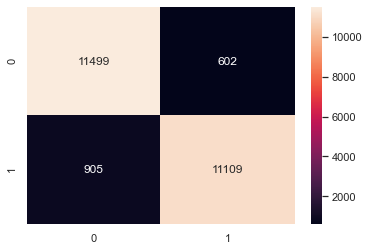

In [335]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True)
print('The accuraccy is:\t',accuracy_score(y_test, y_pred))

# XGBClassifier

In [336]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train,y_train)
y_predx = xgb.predict(X_test)

The accuraccy is:	 0.9496993572465271


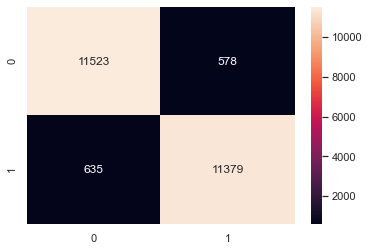

In [337]:
cm = confusion_matrix(y_test, y_predx)
sns.heatmap(cm, fmt='g', annot=True)
print('The accuraccy is:\t',accuracy_score(y_test, y_predx))

Classification Report for XGBClassifier

In [338]:
target_names = ['no','yes']
print(classification_report(y_test, y_predx, target_names=target_names))

              precision    recall  f1-score   support

          no       0.95      0.95      0.95     12101
         yes       0.95      0.95      0.95     12014

    accuracy                           0.95     24115
   macro avg       0.95      0.95      0.95     24115
weighted avg       0.95      0.95      0.95     24115



In [339]:
print(recall_score(y_test, y_predx))

0.9471449975029133


## Classification Report for ANN


In [340]:
target_names = ['no','yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          no       0.93      0.95      0.94     12101
         yes       0.95      0.92      0.94     12014

    accuracy                           0.94     24115
   macro avg       0.94      0.94      0.94     24115
weighted avg       0.94      0.94      0.94     24115

